# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("Country-data.csv", sep = ",")

In [5]:
df.head

<bound method NDFrame.head of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]>

In [6]:
names = df[["country"]].copy
X = df.drop(["country"], axis=1)

In [7]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [15]:
kmeans = KMeans(n_clusters = 5).fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [16]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

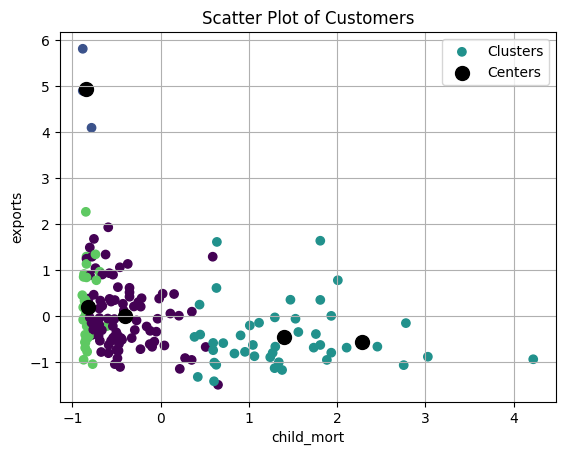

In [17]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 1


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [23]:
WCSSs = []
ks = range(1,15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30).fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

In [24]:
# Bonus optional
WCSSs = [KMeans(n_clusters = k, n_init = 30).fit(X_scaled).inertia_ for k in range(1,15)]

In [25]:
WCSSs

[1503.0,
 1050.2145582853307,
 831.4244352086876,
 700.3229986404376,
 631.448671548053,
 551.4868669336881,
 498.213835317429,
 450.41453436791915,
 422.1057789847988,
 396.3753013728052,
 371.01794794266664,
 349.2089818007504,
 335.5834112813519,
 314.680453440016]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

[]

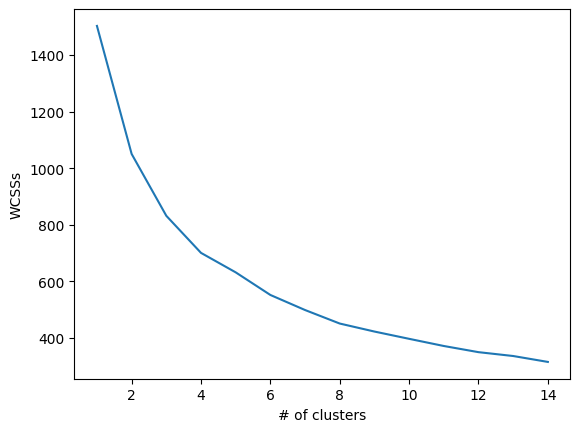

In [26]:
plt.plot(ks,WCSSs)
plt.xlabel("# of clusters")
plt.ylabel("WCSSs")
plt.plot()

# 6.) Do the same for a silhoutte plot

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
SCs = []
ks = range(2,15)
for k in ks:
    kmeans = KMeans(n_clusters = k, n_init = 30, init = "random")
    kmeans.fit(X_scaled)
    labs = kmeans.labels_
    SCs.append(silhouette_score(X_scaled,labs))

[]

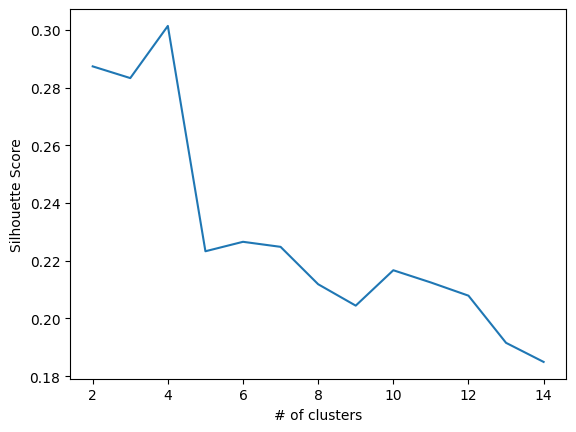

In [29]:
plt.plot(ks,SCs)
plt.xlabel("# of clusters")
plt.ylabel("Silhouette Score")
plt.plot()

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [37]:
kmeans = KMeans(n_clusters = 2, n_init = 30).fit(X_scaled)

In [38]:
preds = pd.DataFrame(kmeans.labels_)

In [39]:
output = pd.concat([preds,df], axis =1)

In [40]:
print("Cluster 1: ")
list(output.loc[output[0] == 0])

Cluster 1: 


[0,
 'country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [41]:
print("Cluster 2: ")
list(output.loc[output[0] == 0])

Cluster 2: 


[0,
 'country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [44]:
#### Write an observation

As we can see, the most interesting in cluster 1 and 2 is that, both of these two cluster have the same output.

#8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [42]:
output.groupby(0).mean()

<ipython-input-42-e9a27c4e94ce>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  output.groupby(0).mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798
1,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294


In [45]:
output.groupby(0).std()

<ipython-input-45-96ffda24b430>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  output.groupby(0).std()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127
1,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189


# 9.) Write an observation about the descriptive statistics.

From question (8), we can have following observations:

- Cluster 0 has, on average, lower child mortality, higher income, life expectancy, and GDP per capita compared to Cluster 1. This suggests that Cluster 0 might represent more developed countries or regions.
- Cluster 1 shows higher variability in child mortality and GDP per capita, as indicated by their higher standard deviations. This could suggest that countries or regions in Cluster 1 are more diverse in these aspects.
- Overall, the means and standard deviations suggest significant differences between the clusters across all the features, which is typically the goal of clustering: to find distinct groups within the data.